In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("Cancer_Data.csv")
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [25]:
df.shape

(569, 33)

In [26]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

Note:
- We have 33 columns of data
- The column "diagnosis" it is our target variable

### Cancer Types:
#### 1. Benign cancer (B)

#### 2. Malignant cancer (M)

## Data Cleaning, Correcting, Completing and Converting

### Null Columns

In [27]:
print('Train columns with null values:\n', df.isnull().sum())

Train columns with null values:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fracta

We don't have any null values!

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [29]:
df['Unnamed: 32']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

We can see that column 32 represents a column full of NaNs, and it's called "Unnamed:32". 
We will need to delete that later.

### Transforming the target column from categorical to numerical

In [30]:
df['diagnosis'].replace(['B', 'M'],
                        [0, 1], inplace=True)

In [31]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [32]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

## EDA

In [33]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

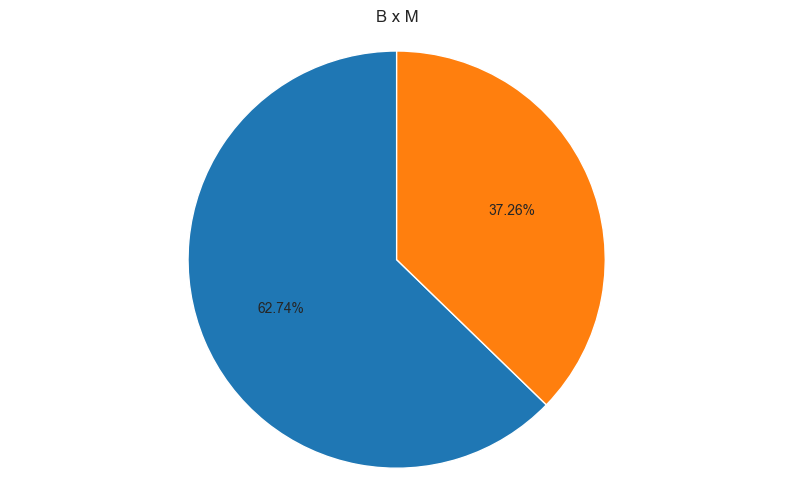

In [34]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
plt.pie(df['diagnosis'].value_counts(),autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.title("B x M")
plt.show()

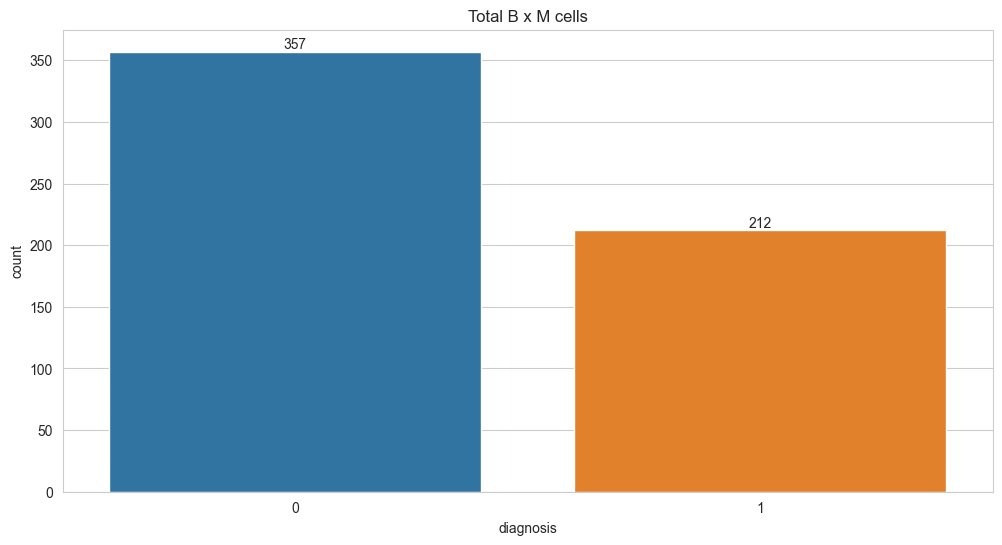

In [35]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x='diagnosis')
plt.title('Total B x M cells')
#plt.ylim([0,3000])
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

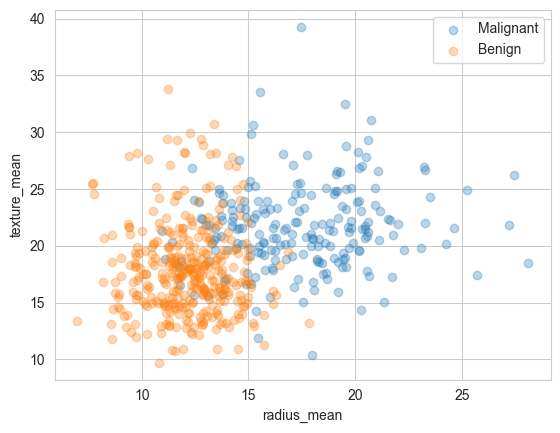

In [36]:
M = df[df.diagnosis == 1] #Diagnosis transfers all values of M to M data
B = df[df.diagnosis == 0] #Diagnosis transfers all values of B to B data

plt.scatter(M.radius_mean,M.texture_mean, label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean,B.texture_mean,label = "Benign", alpha = 0.3)

plt.xlabel("radius_mean")
plt.ylabel("texture_mean")

plt.legend()
plt.show()

In [37]:
df.groupby('diagnosis')[['radius_mean','texture_mean']].mean()

,radius_mean,texture_mean
diagnosis,,
0,12.146524,17.914762
1,17.462830,21.604906


Notes:
- Malignant cells have a higher radius

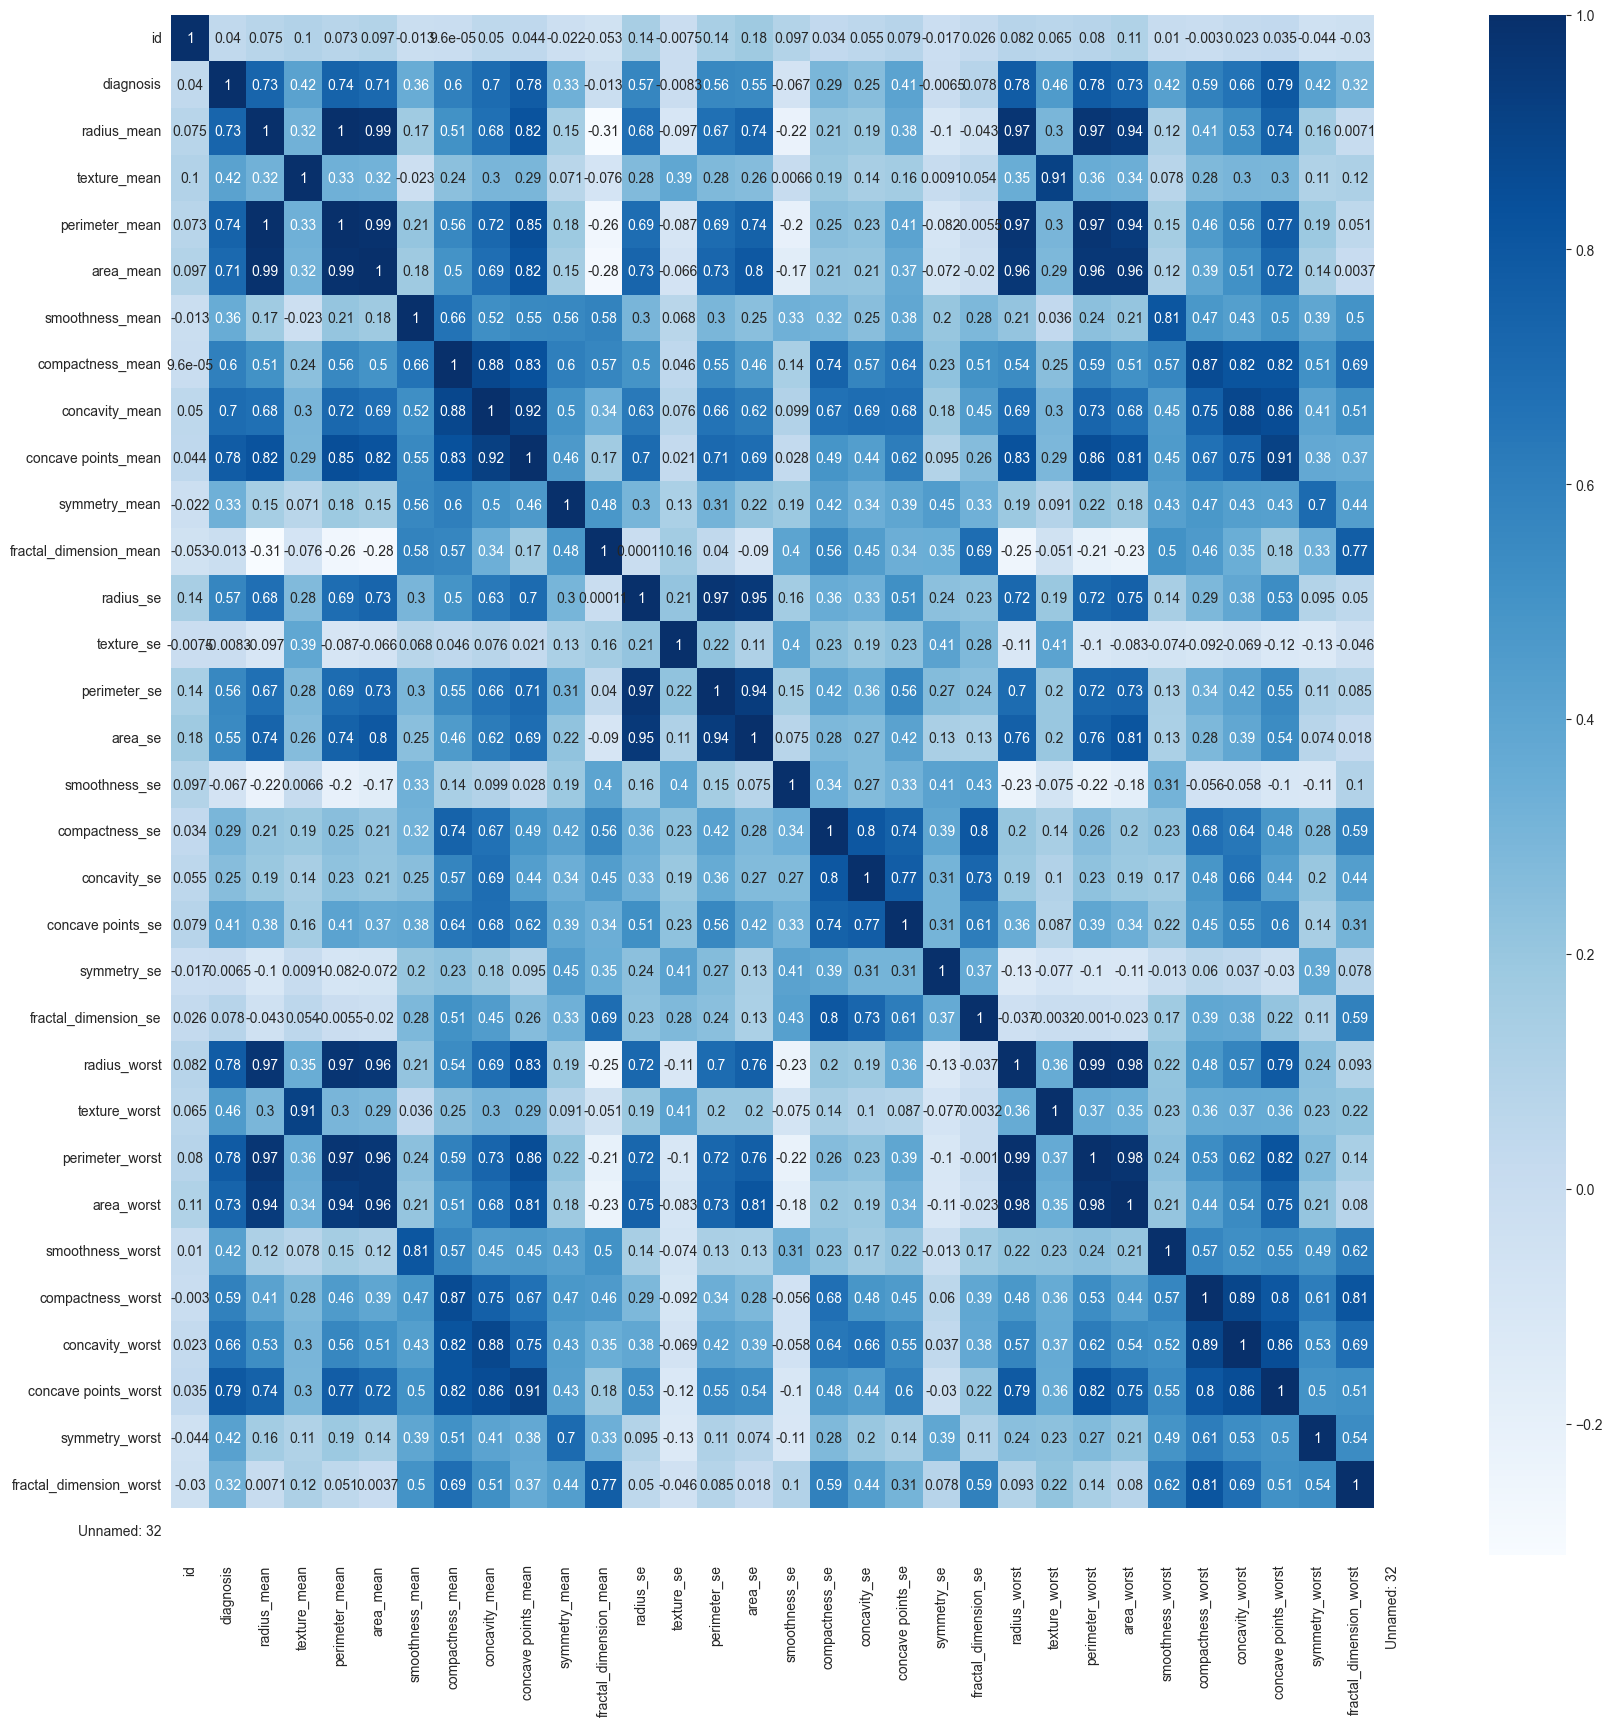

In [38]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')
plt.show()

In [39]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872,NaN
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN


## Building our model

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV as gscv
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from scipy.stats import expon, uniform

In [41]:
df.shape

(569, 33)

Dropping both "Unnamed: 32" and "Id" columns, to build our model

In [42]:
df = df.drop(labels="Unnamed: 32", axis=1)
df = df.drop(labels="id", axis=1)

In [43]:
df.shape

(569, 31)

In [44]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [45]:
X, y = df.drop('diagnosis', axis=1), df[['diagnosis']]

In [46]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=43, stratify=y)

In [47]:
model_dict = {}

In [48]:
# Naive Bayes
classifer = GaussianNB()
predictor = classifer.fit(X_train, y_train)
y_pred = predictor.predict(X_val)
accuracy_naive_bayes = accuracy_score(y_val, y_pred)
model_dict['naive_bayes'] = accuracy_naive_bayes
print(accuracy_naive_bayes)

0.9361702127659575


C:\Users\29492\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
#Linear Discriminant Analysis
classifer = LinearDiscriminantAnalysis()
predictor = classifer.fit(X_train, y_train)
y_pred = predictor.predict(X_val)
accuracy_lda = accuracy_score(y_val, y_pred)
model_dict['linear_discriminant_analysis'] = accuracy_lda
print(accuracy_lda)

0.9680851063829787


C:\Users\29492\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
# Logistic Regression
classifier = LogisticRegression(random_state=42)
predictor = classifier.fit(X_train, y_train)
y_pred = predictor.predict(X_val)
accuracy_log_reg = accuracy_score(y_val, y_pred)
model_dict['logistic_regression'] = accuracy_log_reg
print(accuracy_log_reg)

C:\Users\29492\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29492\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9574468085106383


In [51]:
# Support Vector Classifier
classifier = SVC(random_state=42)
predictor_svc = classifier.fit(X_train, y_train)
y_pred = predictor_svc.predict(X_val)
accuracy_svc = accuracy_score(y_val, y_pred)
model_dict['SVC'] = accuracy_svc
print(accuracy_svc)

0.9095744680851063


C:\Users\29492\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
# Kneighbors
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
predictor = classifier.fit(X_train, y_train)
y_pred = predictor.predict(X_val)
accuracy_knn = accuracy_score(y_val, y_pred)
model_dict['kneighbors_classifier'] = accuracy_knn
print(accuracy_knn)

0.9414893617021277


C:\Users\29492\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\29492\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [53]:
#Stochastic Gradient Descent Classifier
classifier = SGDClassifier(random_state=42)
predictor = classifier.fit(X_train, y_train)
y_pred = predictor.predict(X_val)
accuracy_sgdc = accuracy_score(y_val, y_pred)
model_dict['sgd_classifier'] = accuracy_sgdc
print(accuracy_sgdc)

0.8563829787234043


C:\Users\29492\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
#Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)
predictor = classifier.fit(X_train, y_train)
y_pred = predictor.predict(X_val)
accuracy_rfc = accuracy_score(y_val, y_pred)
model_dict['random_forest_classifier'] = accuracy_rfc
print(accuracy_rfc)

C:\Users\29492\AppData\Local\Temp\ipykernel_19308\1874073298.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  predictor = classifier.fit(X_train, y_train)


0.9627659574468085


In [55]:
classifier = GradientBoostingClassifier(random_state=42)
predictor_gbc = classifier.fit(X_train, y_train)
y_pred = predictor_gbc.predict(X_val)
accuracy_gbc = accuracy_score(y_val, y_pred)
model_dict['gradient_boosting_classifier'] = accuracy_gbc
print(accuracy_gbc)

C:\Users\29492\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9574468085106383


In [56]:
#xboost
classifier = XGBClassifier(random_state=42, eval_metric='logloss')
predictor_xgb = classifier.fit(X_train, y_train)
y_pred = predictor_xgb.predict(X_val)
accuracy_xgb = accuracy_score(y_val, y_pred)
model_dict['xgboost_classifier'] = accuracy_xgb
print(accuracy_xgb)

0.973404255319149


In [57]:
#adboost
dtc=DecisionTreeClassifier(criterion='entropy', random_state=42)
classifier = AdaBoostClassifier(dtc,random_state=42)
predictor = classifier.fit(X_train, y_train)
y_pred = predictor.predict(X_val)
accuracy_ada = accuracy_score(y_val, y_pred)
model_dict['adaboost_classifier'] = accuracy_ada
print(accuracy_ada)

0.9414893617021277


C:\Users\29492\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
#lgbm
classifier = LGBMClassifier(random_state=42)
predictor_lgbm = classifier.fit(X_train, y_train)
y_pred = predictor_lgbm.predict(X_val)
accuracy_lgbm = accuracy_score(y_val, y_pred)
model_dict['lgbm_classifier'] = accuracy_lgbm
print(accuracy_lgbm)

C:\Users\29492\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29492\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9680851063829787


In [59]:
# extra trees
classifier = ExtraTreesClassifier(random_state=42)
predictor_etc = classifier.fit(X_train, y_train)
y_pred = predictor_etc.predict(X_val)
accuracy_etc = accuracy_score(y_val, y_pred)
model_dict['etc_classifier'] = accuracy_etc
print(accuracy_etc)

0.9680851063829787


C:\Users\29492\AppData\Local\Temp\ipykernel_19308\527483620.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  predictor_etc = classifier.fit(X_train, y_train)


In [60]:
model_dict

{'naive_bayes': 0.9361702127659575,
 'linear_discriminant_analysis': 0.9680851063829787,
 'logistic_regression': 0.9574468085106383,
 'SVC': 0.9095744680851063,
 'kneighbors_classifier': 0.9414893617021277,
 'sgd_classifier': 0.8563829787234043,
 'random_forest_classifier': 0.9627659574468085,
 'gradient_boosting_classifier': 0.9574468085106383,
 'xgboost_classifier': 0.973404255319149,
 'adaboost_classifier': 0.9414893617021277,
 'lgbm_classifier': 0.9680851063829787,
 'etc_classifier': 0.9680851063829787}

In [61]:
model_accuracies_df = pd.DataFrame(columns=['Model', 'Accuracy'])
model_accuracies_df['Model'] = model_dict.keys()
model_accuracies_df['Accuracy'] = model_dict.values()

In [62]:
model_accuracies_df

,Model,Accuracy
0,naive_bayes,0.936170
1,linear_discriminant_analysis,0.968085
2,logistic_regression,0.957447
3,SVC,0.909574
4,kneighbors_classifier,0.941489
5,sgd_classifier,0.856383
6,random_forest_classifier,0.962766
7,gradient_boosting_classifier,0.957447
8,xgboost_classifier,0.973404
9,adaboost_classifier,0.941489


In [63]:
model_accuracies_df.sort_values(by = "Accuracy", ascending=False)

,Model,Accuracy
8,xgboost_classifier,0.973404
1,linear_discriminant_analysis,0.968085
10,lgbm_classifier,0.968085
11,etc_classifier,0.968085
6,random_forest_classifier,0.962766
2,logistic_regression,0.957447
7,gradient_boosting_classifier,0.957447
4,kneighbors_classifier,0.941489
9,adaboost_classifier,0.941489
0,naive_bayes,0.936170


### The best model it's the XGBoost Classifier!